<a href="https://colab.research.google.com/github/easy-min/dacon_/blob/main/dacon_music2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import preprocessing # Import LabelEncoder
from sklearn.preprocessing import MinMaxScaler # 정규화
from sklearn.preprocessing import StandardScaler # 표준화

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/drive/My Drive/dacon/music/train.csv")
test = pd.read_csv("/content/drive/My Drive/dacon/music/test.csv")
train = train.drop(["ID"], axis = 1)
test = test.drop(["ID"], axis = 1)

In [ ]:
X = train.drop(['genre'], axis = 1)
y = train['genre']

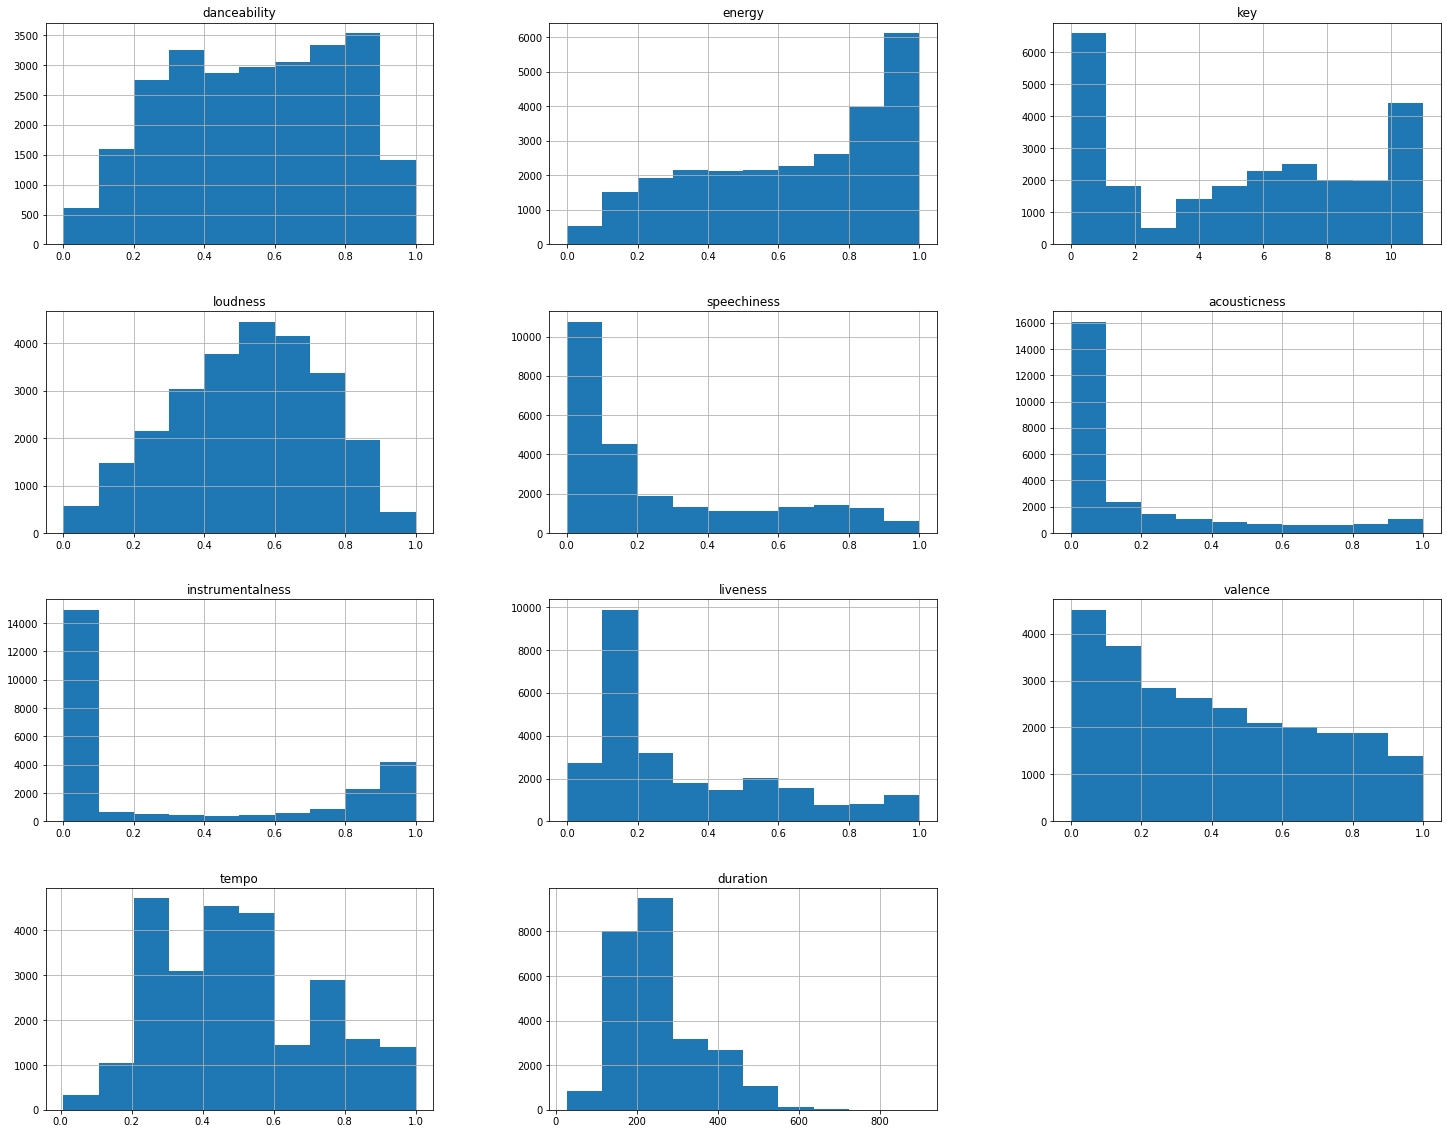

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]
train.hist(figsize=(25,20));

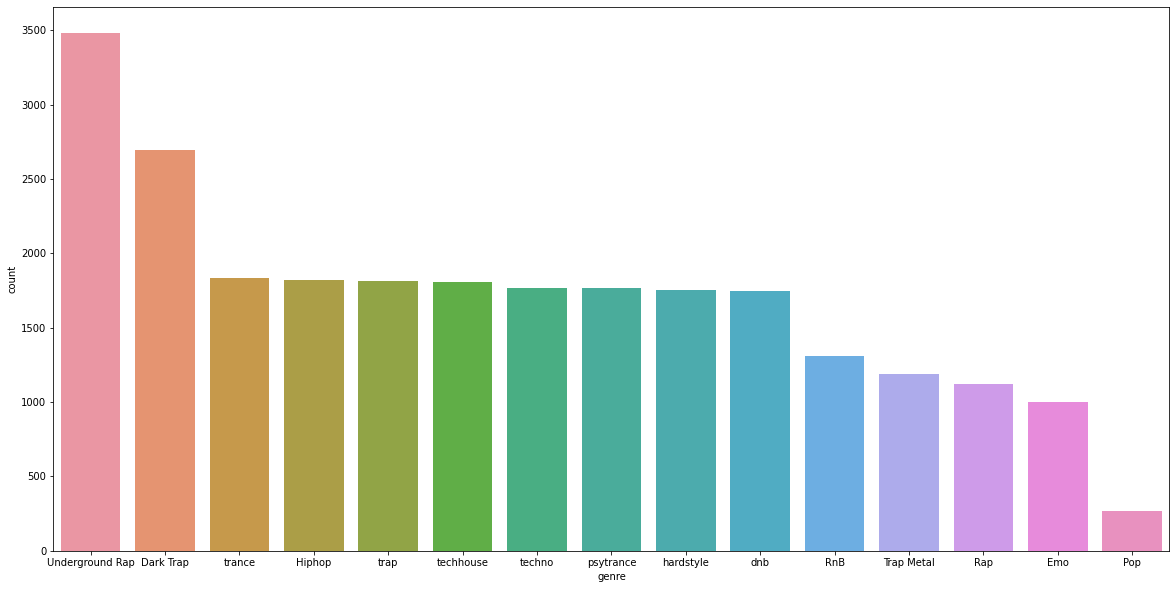

In [ ]:
sns.countplot(x=train['genre'], order=train['genre'].value_counts().index)

In [ ]:
from scipy.stats import skew, kurtosis
df0 = X.apply(['skew', 'kurtosis']).T
df0.loc[ (df0['skew'] >= 2) | (df0['kurtosis'] >= 3) ] # skew, kurtosis 이상 해당 없음.

,skew,kurtosis


# [1] 전처리


## (1) 표준화만 : 이상치 제거

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration'])
X_scaled_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04
mean,3.079214e-17,2.281418e-17,-5.542586e-17,1.896166e-16,-5.640561e-17,-4.366886e-17,-1.931507e-17,5.094700e-17,-2.233830e-16,4.814772e-17,6.214415e-17
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-2.246766e+00,-2.334556e+00,-1.466757e+00,-2.497073e+00,-9.783792e-01,-6.567568e-01,-7.753762e-01,-1.274293e+00,-1.411878e+00,-2.234391e+00,-2.190849e+00
25%,-8.418137e-01,-8.438870e-01,-1.193528e+00,-7.197277e-01,-7.547554e-01,-6.431613e-01,-7.753762e-01,-7.319175e-01,-8.946539e-01,-8.158840e-01,-6.959686e-01
50%,3.664279e-02,2.152150e-01,1.726153e-01,6.861471e-02,-5.137768e-01,-5.252116e-01,-7.591147e-01,-4.860618e-01,-1.474741e-01,-9.030926e-02,-2.591531e-01
75%,8.886920e-01,9.220102e-01,9.923012e-01,7.611549e-01,6.453789e-01,2.159241e-01,1.261064e+00,6.953026e-01,8.275640e-01,7.014520e-01,4.882868e-01
max,1.879380e+00,1.301222e+00,1.538759e+00,2.266822e+00,2.633226e+00,3.017321e+00,1.726393e+00,2.653116e+00,2.082882e+00,2.235222e+00,6.244545e+00


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_df, y, test_size = 0.20)

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
val_pred = model.predict(X_valid)
print("현재 Macro F1 Score 점수는 {}입니다".format(f1_score(val_pred,y_valid, average= 'macro')))

현재 Macro F1 Score 점수는 0.6437808474789961입니다


## (2) 정규화만 : 상대적 크기 변환


In [ ]:
scaler2 = MinMaxScaler()
scaler2.fit(X)
X_transformed = scaler2.transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration'])
X_transformed_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000
mean,0.544519,0.642106,0.488022,0.524166,0.270899,0.178754,0.309931,0.324461,0.403999,0.499907,0.259721
std,0.242362,0.275050,0.332728,0.209916,0.276891,0.272182,0.399725,0.254626,0.286148,0.223737,0.118550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340500,0.410000,0.090909,0.373087,0.061918,0.003700,0.000000,0.138100,0.148000,0.317367,0.177215
50%,0.553400,0.701300,0.545455,0.538569,0.128642,0.035804,0.006500,0.200700,0.361800,0.479702,0.228999
75%,0.759900,0.895700,0.818182,0.683942,0.449595,0.237524,0.814000,0.501500,0.640800,0.656845,0.317606
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_transformed_df, y, test_size = 0.20)

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
val_pred = model.predict(X_valid)
print("현재 Macro F1 Score 점수는 {}입니다".format(f1_score(val_pred,y_valid, average= 'macro')))

현재 Macro F1 Score 점수는 0.6203793504661125입니다


## (3) 표준화, 정규화 모두 진행

In [ ]:
X_final = scaler2.transform(X_scaled_df)
X_final_df = pd.DataFrame(X_final, columns = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration'])
X_final_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,25383.000000,2.538300e+04,2.538300e+04,2.538300e+04,2.538300e+04,25383.000000,25383.000000
mean,3.079214e-17,2.281418e-17,-2.116960e-18,1.890568e-16,-0.001101,-4.184932e-17,-1.931507e-17,5.094700e-17,-2.233830e-16,-0.007354,-0.032221
std,1.000020e+00,1.000020e+00,9.091088e-02,1.000520e+00,1.001121,1.000120e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.007374,0.001151
min,-2.246766e+00,-2.334556e+00,-1.333415e-01,-2.498322e+00,-0.980558,-6.568224e-01,-7.753762e-01,-1.274293e+00,-1.411878e+00,-2.258175,-0.034742
25%,-8.418137e-01,-8.438870e-01,-1.085025e-01,-7.200878e-01,-0.756688,-6.432256e-01,-7.753762e-01,-7.319175e-01,-8.946539e-01,-0.829237,-0.033022
50%,3.664279e-02,2.152150e-01,1.569230e-02,6.864903e-02,-0.515444,-5.252641e-01,-7.591147e-01,-4.860618e-01,-1.474741e-01,-0.098327,-0.032519
75%,8.886920e-01,9.220102e-01,9.020920e-02,7.615357e-01,0.644988,2.159457e-01,1.261064e+00,6.953026e-01,8.275640e-01,0.699257,-0.031659
max,1.879380e+00,1.301222e+00,1.398871e-01,2.267956e+00,2.635025,3.017623e+00,1.726393e+00,2.653116e+00,2.082882e+00,2.244305,-0.025035


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_final_df, y, test_size = 0.20) # 8:2의 비율로 분리리

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
val_pred = model.predict(X_valid)
print("현재 Macro F1 Score 점수는 {}입니다".format(f1_score(val_pred,y_valid, average= 'macro')))

현재 Macro F1 Score 점수는 0.6280482142715137입니다


# [2] 모델링

## (1) decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print("train score: %.3f" %(tree.score(X_train, y_train)))
print("test score: %.3f" %(tree.score(X_valid, y_valid)))

train score: 0.961
test score: 0.562


## (2) gradiant boosting

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 42)
gbrt.fit(X_train, y_train)

print("train score: %.3f" %(gbrt.score(X_train, y_train)))
print("test score: %.3f" %(gbrt.score(X_valid, y_valid)))

train score: 0.748
test score: 0.681


In [58]:
pred_gbrt1 = gbrt.predict(X_valid)
print("Macro F1 Score: %.4f" %(f1_score(pred_gbrt1, y_valid, average = "macro")))

Macro F1 Score: 0.6444


## (3) random forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
random = RandomForestClassifier(random_state = 42)
random.fit(X_train, y_train)
val_pred2 = random.predict(X_valid)

print("train score: %.3f" %(random.score(X_train, y_train)))
print("test score: %.3f" %(random.score(X_valid, y_valid)))

train score: 0.961
test score: 0.662


decision < random < gradiant 순으로 정확도 높았음.
이전의 표준화, 정규화를 모두 진행하지 않았을 때보다 정확도가 더 높아짐


# [3] 개선 시도

## (1) LGBM 모델을 돌려서 macro F1 score 수치를 구해 지표 개선

### 1. PCA

PCA(Principal Component Analysis): 주성분 분석
고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법이다. **차원축소(dimension reduction)**라고도 한다

주성분분석을 위해 알아야 하는 개념은 다음 아래와 같다.

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=definitice&logNo=221261545041

- (고유값과 고유벡터) 어떠한 정방행렬(nxn) A에 대해 Ax =λx를 만족시키는 0이 아닌 벡터 x가 존재할 때, 스칼라 λ를 행렬 A의 고유값(또는 고유근), 벡터 x를 λ에 대응되는 행렬 A의 고유벡터라고 한다.

- (행렬의 대각화) 이 때, 고유벡터 x들을 차례로 열벡터로 갖는 행렬 P = (x1, x2, ...xn)에 대해, 행렬 A는  P-1AP = Diag(λ1, λ2, ..., λn)과 같이 대각화된다고 하며, 이를 Eigenvalue Decomposition(고유근분해, 고유값분해, Eigen Decomposition)이라고 한다. 이는 때로 스펙트럼 분해라고 불리기도 하는 듯하다.

- 주성분분석이란 결국 기존 변수들을 선형결합을 이용하여 새로운 변수들(새로운 좌표)로 변환하는 것이며, 이 때 좌표의 변환에 이용되는 것이 바로 고유벡터라는 것이다. 그리고 여기서 전체 고유치가 아닌 가장 큰 고유치 몇개만을 선택하여, 그 선택된 고유치와 관련된 고유벡터만을 적용하면 차원 축소의 의미를 가지게 되는 것이다.


In [ ]:
features = X_final_df.T
covmat = np.cov(features)
covmat

In [ ]:
import numpy.linalg as lin # 고유값 (Eigenvalue), 고유벡터 (Eigenvector): w, v = np.linalg.eig(x)
lin.eig(covmat)

In [ ]:
eigenvalues = lin.eig(covmat)[0]
eigenvectors = lin.eig(covmat)[1]

In [ ]:
def new_coordinates(x,eigenvectors):
    for i in range(eigenvectors.shape[0]):
        if i == 0:
            new = [x.dot(eigenvectors.T[i])]
        else:
            new = np.concatenate((new,[x.dot(eigenvectors.T[i])]),axis=0)
    return new.T
new_coordinates(X_final_df,eigenvectors)

array([[-1.24241335,  2.51242376,  0.77676973, ...,  0.31434669,
        -0.11292607, -0.03257632],
       [-0.06444469, -1.87606676,  0.68869125, ..., -0.0236745 ,
        -0.10842474, -0.03014083],
       [ 1.95937209, -1.204327  , -1.48013702, ...,  0.30575848,
        -0.06756542, -0.032618  ],
       ...,
       [-1.61398609, -0.76674402, -1.21762275, ...,  0.11761299,
        -0.05839771, -0.03204297],
       [ 1.62126896,  1.5751297 , -1.86063966, ...,  0.28111318,
         0.11681584, -0.03276668],
       [ 1.21492104, -0.12845268,  0.27351583, ...,  0.03233063,
        -0.0998054 , -0.03195602]])

In [ ]:
#PCA 구현
def PCA(x,number):
    scaler = StandardScaler()
    xx = scaler.fit_transform(x) #scaling
    features = xx.T
    cov_matrix = np.cov(features) #공분산
    
    eigenvalues = lin.eig(covmat)[0] #eigenvalue
    eigenvectors = lin.eig(covmat)[1] #eigenvector
    
    new_coordinates(xx,eigenvectors)
    
    new_coordinate = new_coordinates(xx,eigenvectors)
    
    index = eigenvalues.argsort() #작은 것에서 큰 순서대로 나열한 eigenvalues 배열의 인덱스를 반환

    index = list(index)
    
    for i in range(number):
        if i==0:
            new = [new_coordinate[:,index.index(i)]]
        else:
            new = np.concatenate(([new_coordinate[:,index.index(i)]],new),axis=0)
    return new.T #모든 고유벡터 축으로 projection하여 새로운 축에 나타난 데이터 return

In [ ]:
PCA(X_final_df, 4)

array([[ 0.51723497,  0.31364237, -1.26311209, -0.76377909],
       [ 0.53833614, -0.02461355, -1.2596995 ,  2.51585048],
       [ 0.29884368,  0.3049004 , -0.72092503, -0.99635422],
       ...,
       [ 0.21330977,  0.11804753, -0.71239952,  0.96278027],
       [-1.23027416,  0.28157627,  1.45058886, -1.29640911],
       [-1.51977955,  0.03146666, -1.00178635, -0.24919597]])

### 2. LGBM

In [ ]:
def evaluate_macroF1_lgb(truth, predictions):  
    pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    return ('macroF1', f1, True)

In [ ]:
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier 
model = LGBMClassifier(n_estimators=400, learning_rate = 0.05) 
#LGBM의 하이퍼 파라미터 중 n_estimators와 learning_rate은 
#전자는 "몇 개의 모델을 합칠 건지 지정"하고
#후자는 학습률이며, 모델이 최적화되는(최적해에 접근하는) 과정에서 
#learning_rate만큼 이동시키면서 최적해에 도달한다.
#경사하강법에 관련된 개념으로 이해하면 된다.

#사이킷런 래퍼 LIghtGBM을 사용했음.
#파이썬 래퍼 LightGBM은 하이퍼파라미터의 명칭이 다른 경우가 존재함.

evals = [(X_train, y_train), (X_valid, y_valid)] 
#eval_set에 들어갈 내용으로, n_estimators만큼 반복적으로 학습을 수행할 때마다 
#얼마나 성능이 향상되었는지 X_valid, y_valid를 검증데이터로 인식 및 검증케함.

In [ ]:
fit_params={"early_stopping_rounds":50, 
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : evals,
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': True,
            'categorical_feature': 'auto'}
model.fit(X_train,y_train, **fit_params)
valid_pred = model.predict(X_valid)

In [ ]:
print("현재 Macro F1 Score의 검증 점수는 {}입니다.".format(f1_score(valid_pred, y_valid, average = "macro"))) 

현재 Macro F1 Score의 검증 점수는 0.6503728195106444입니다.


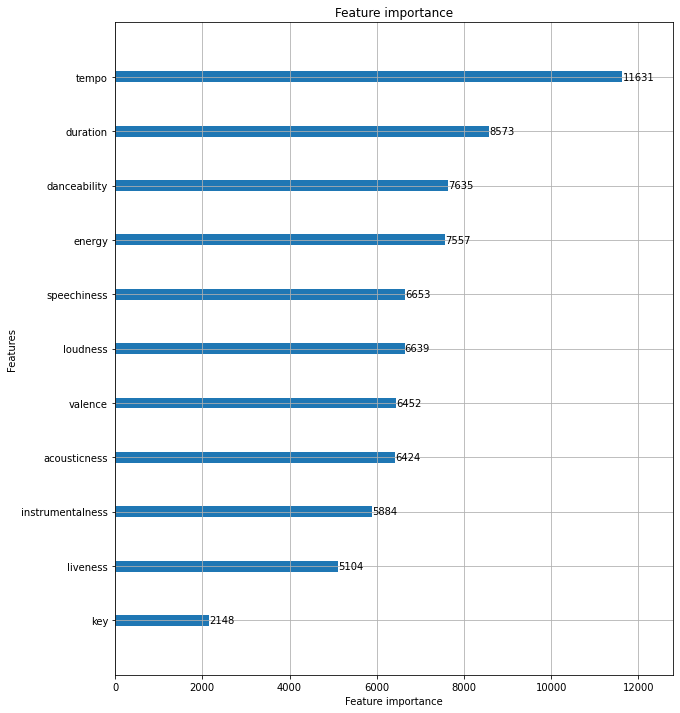

In [ ]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(model, ax=ax) #light gbm 모델에서 중요하게 여기는 요소를 확인했음. key보다는 tempo가 중요했음.

## (2) Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_valid)

print("Macro F1 Score: %.4f" %(f1_score(pred_nb, y_valid, average = "macro")))
print("train score: %.3f" %(nb.score(X_train, y_train)))
print("test score: %.3f" %(nb.score(X_valid, y_valid)))

Macro F1 Score: 0.5651
train score: 0.592
test score: 0.598


## (3) OvO((One-versus-all)), OvR((One-versus-one))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
pred_ovr = ovr_clf.predict(X_valid)

print("Macro F1 Score: %.4f" %(f1_score(pred_ovr, y_valid, average = "macro")))
print("train score: %.3f" %(ovr_clf.score(X_train, y_train)))
print("test score: %.3f" %(ovr_clf.score(X_valid, y_valid)))

Macro F1 Score: 0.5238
train score: 0.642
test score: 0.586


In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SVC())
ovo_clf.fit(X_train, y_train)
pred_ovo = ovo_clf.predict(X_valid)

print("Macro F1 Score: %.4f" %(f1_score(pred_ovo, y_valid, average = "macro")))
print("train score: %.3f" %(ovo_clf.score(X_train, y_train)))
print("test score: %.3f" %(ovo_clf.score(X_valid, y_valid)))

Macro F1 Score: 0.5474
train score: 0.633
test score: 0.617


## (4) 변수 제거거

중요하지 않다고 생각하는 변수를 임의로 제거하고 확인해보기기

In [ ]:
X_delete_df = train.drop(["genre", "key"], axis = 1)

In [ ]:
XX_train, XX_valid, yy_train, yy_valid = train_test_split(X_delete_df, y, test_size = 0.20) # 8:2의 비율로 분리

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state = 42)
gbrt.fit(XX_train, yy_train)

print("train score: %.3f" %(gbrt.score(XX_train, yy_train)))
print("test score: %.3f" %(gbrt.score(XX_valid, yy_valid)))

train score: 0.744
test score: 0.689


In [55]:
pred_gbrt = gbrt.predict(XX_valid)
print("Macro F1 Score: %.4f" %(f1_score(pred_gbrt, yy_valid, average = "macro")))

Macro F1 Score: 0.6493
